In [1]:
dir_raiz = '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/Datasets/'

In [2]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import numpy as np
import pandas as pd

In [4]:
# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

def plot_loss(history):
  plt.plot(history.history['loss'], label='Entrenamiento')
  plt.plot(history.history['val_loss'], label='Validación')
  plt.xlabel('Época')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

def plot_acc(history):
  plt.plot(history.history['accuracy'], label='Entrenamiento')
  plt.plot(history.history['val_accuracy'], label='Validación')
  plt.xlabel('Época')
  plt.ylabel('Exactitud')
  plt.legend()
  plt.grid(True)

import seaborn as sns

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import backend, initializers
backend.set_image_data_format('channels_first')

from keras.models import Model, Sequential
from keras.layers import Activation, Flatten, Dense, Normalization, Input
from keras.activations import softmax
from tensorflow.keras.optimizers.legacy import Adam

In [6]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [7]:
from datetime import datetime
from time import sleep
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [8]:
from sklearn import metrics

In [9]:
import csv
feature_nams = list(csv.reader(open(dir_raiz+'features.csv','r'), delimiter=','))[0]

In [10]:
X_train = pd.read_csv( dir_raiz + 'completo/train/X.csv', header=None)
y_train = pd.read_csv( dir_raiz + 'completo/train/y.csv', header=None)[0].map(str)

In [11]:
y_train = LE.fit_transform(y_train)

In [12]:
X_test = pd.read_csv( dir_raiz + 'completo/test/X.csv', header=None)
y_test = pd.read_csv( dir_raiz + 'completo/test/y.csv', header=None)[0].map(str)

In [13]:
y_test = LE.transform(y_test)

In [14]:
X_train.shape

(12929043, 22)

In [15]:
X_test.shape

(3233956, 22)

In [16]:
y_train.shape

(12929043,)

In [17]:
y_test.shape

(3233956,)

In [18]:
Batch_size      = 64
n_features      = len(feature_nams)

Epochs          = 200
Learning_Rate   = 0.001
Activation_func = 'relu'
Optimizer       = 'adam'
Loss_func       = 'sparse_categorical_crossentropy'

In [19]:
initializer = tf.keras.initializers.GlorotNormal(seed=1234)

modelito = Sequential()

modelito.add(Input(shape=(n_features,)))
modelito.add(Normalization())

modelito.add(Dense(42, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(39, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(36, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(33, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(30, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(27, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(24, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(21, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(18, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))

modelito.add(Dense(n_features, activation='softmax', kernel_initializer=initializer))

In [20]:
initializer = tf.keras.initializers.GlorotNormal(seed=1234)

modelito = Sequential()

modelito.add(Input(shape=(n_features,)))
modelito.add(Normalization())

modelito.add(Dense(24, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(23, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(22, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(21, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(20, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(19, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(18, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(17, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(16, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))
modelito.add(Dense(15, kernel_initializer=initializer))
modelito.add(Activation(Activation_func))

modelito.add(Dense(n_features, activation='softmax', kernel_initializer=initializer))

In [21]:
modelito.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 22)               45        
 ion)                                                            
                                                                 
 dense_10 (Dense)            (None, 24)                552       
                                                                 
 activation_9 (Activation)   (None, 24)                0         
                                                                 
 dense_11 (Dense)            (None, 23)                575       
                                                                 
 activation_10 (Activation)  (None, 23)                0         
                                                                 
 dense_12 (Dense)            (None, 22)                528       
                                                      

In [22]:
modelito.compile( loss=Loss_func, optimizer=Adam(Learning_Rate) )

In [ ]:
print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )
ajuste_modelo = modelito.fit( X_train, y_train, verbose=1, callbacks=[cb], epochs=Epochs, batch_size=Batch_size, validation_data=(X_test, y_test) )#, validation_split=Validation_size )
print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )

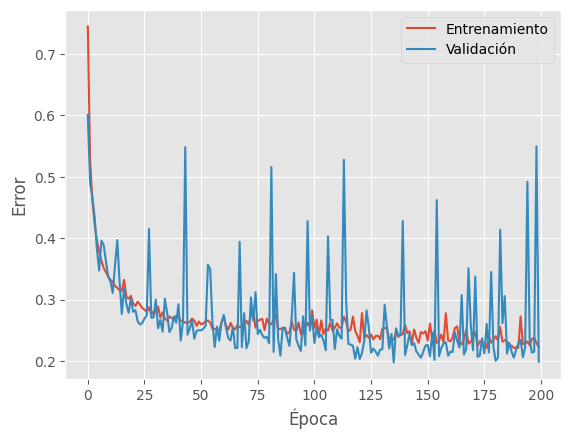

In [ ]:
plot_loss(ajuste_modelo)

In [ ]:
print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )
y_pred = np.argmax(modelito.predict(X_test),axis=1)
print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )

09/06/2023 21:14:23
14358/14358 [==============================] - 26s 2ms/step
09/06/2023 21:15:05


In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.9294639495225845

In [ ]:
con_mat = metrics.confusion_matrix(y_test, y_pred)

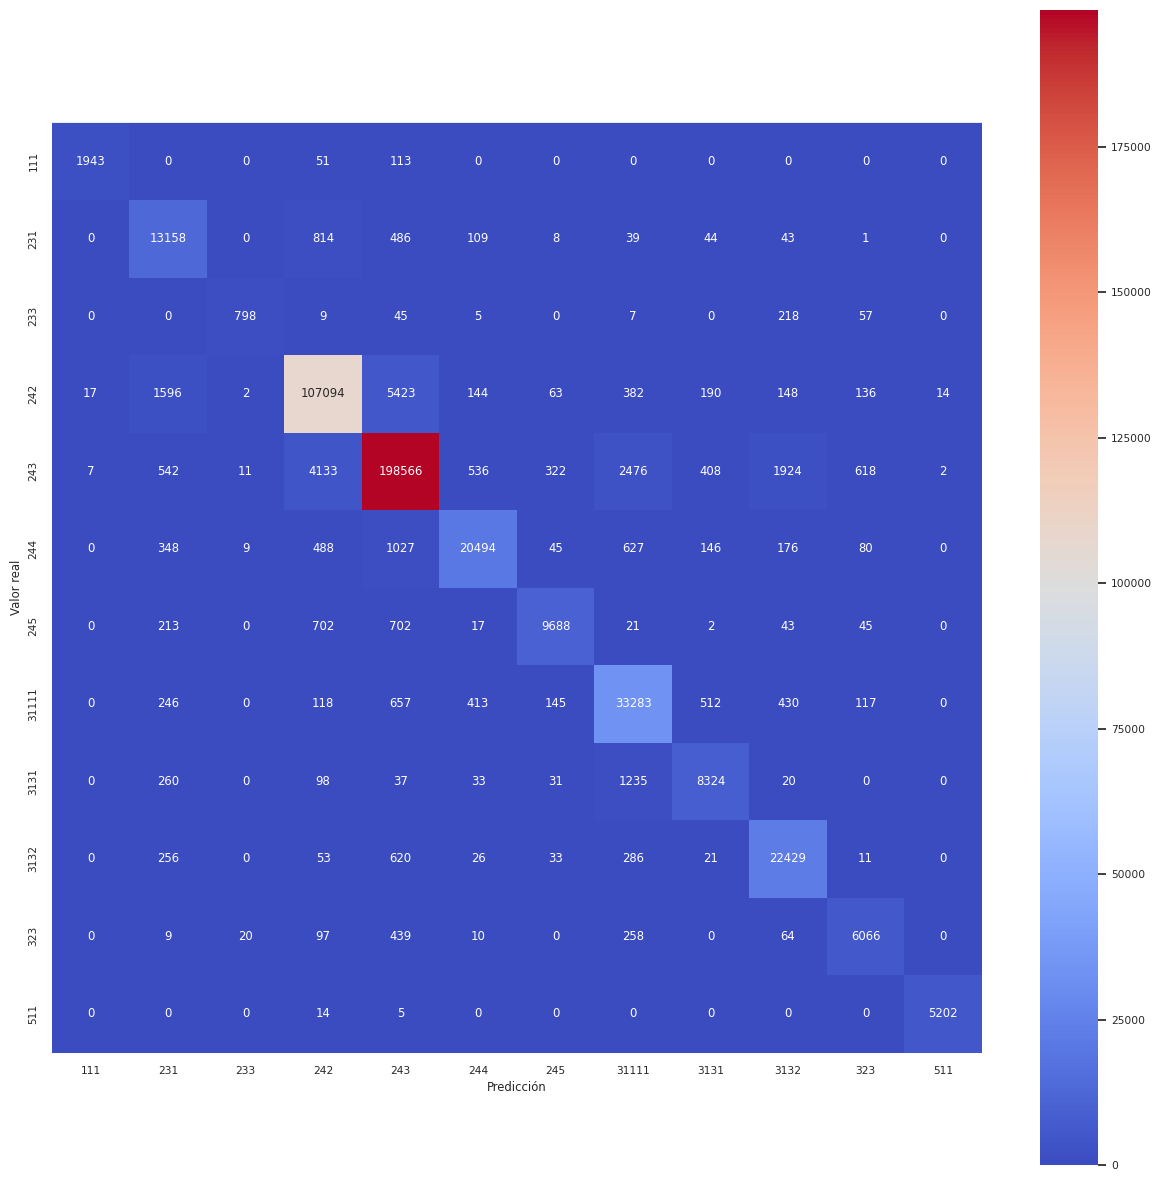

In [ ]:
sns.set(rc={'figure.figsize':(15,15)}, font_scale=0.7)
y_labels=LE.classes_
sns.heatmap(con_mat, vmin=0, square=True, annot=True, cbar=True, cmap='coolwarm',xticklabels=y_labels, yticklabels=y_labels, fmt='.10g')
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()